# Исследование сервиса аренды велосипедов в Лондоне

In [3]:
import pandas as pd

In [101]:
df = pd.read_csv('london_merged.csv')

In [5]:
df.shape

(17414, 10)

In [4]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [153]:
df['date'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df['hour'] = df['date'].dt.hour
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday
df['t_diff'] = abs(df['t2']-df['t1'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,hour,month,weekday,t_diff
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01-04 00:00:00,0,1,6,1.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01-04 01:00:00,1,1,6,0.5
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01-04 02:00:00,2,1,6,0.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01-04 03:00:00,3,1,6,0.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01-04 04:00:00,4,1,6,2.0


In [5]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


<AxesSubplot:>

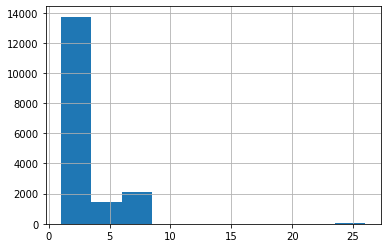

In [6]:
df['weather_code'].hist()

<AxesSubplot:>

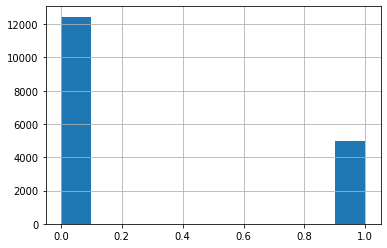

In [7]:
df['is_weekend'].hist()

<AxesSubplot:>

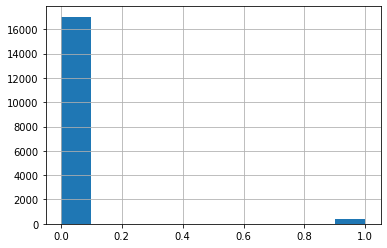

In [8]:
df['is_holiday'].hist()

<AxesSubplot:>

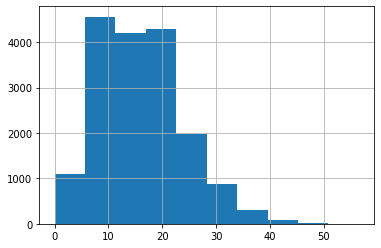

In [9]:
df['wind_speed'].hist()

Нормальный ветер +- 5-15 м/c

<AxesSubplot:>

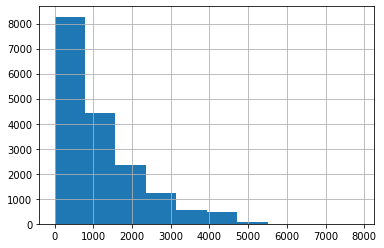

In [13]:
df['cnt'].hist()

<AxesSubplot:>

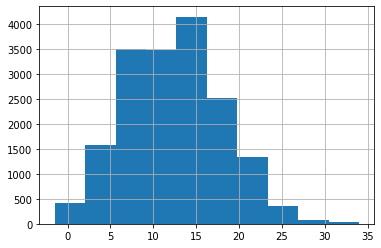

In [34]:
df['t1'].hist()

<AxesSubplot:>

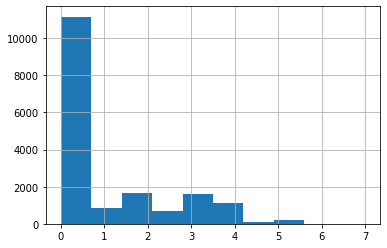

In [19]:
df['t_diff'].hist()

In [149]:
import seaborn as sns
sns.set_style("whitegrid")

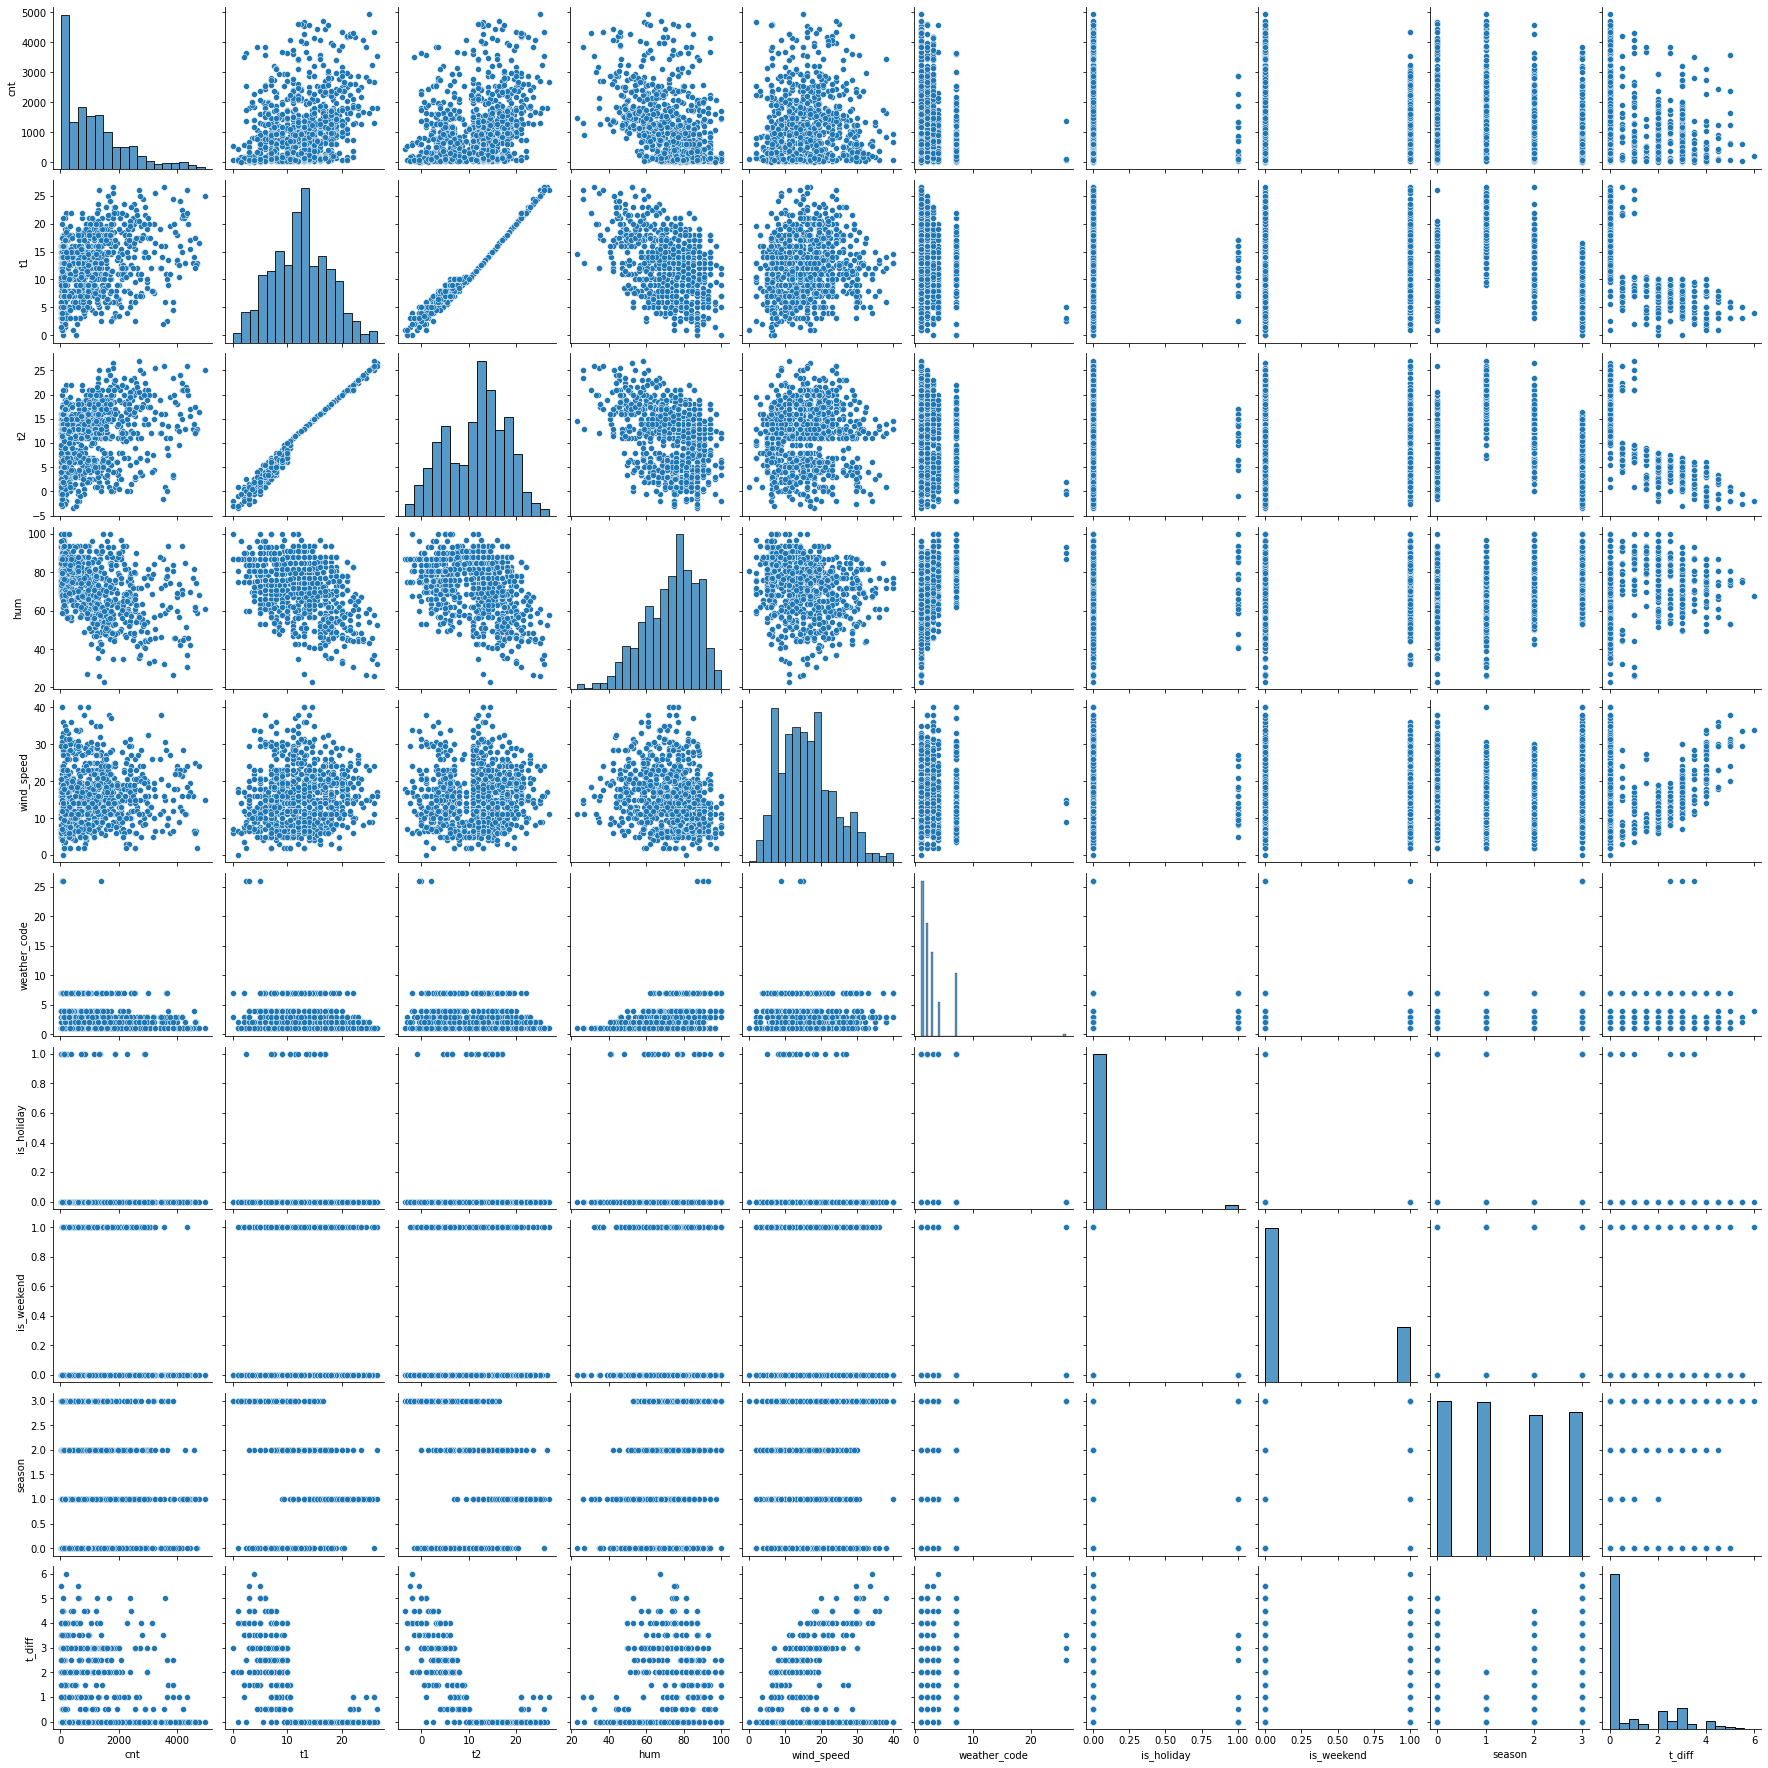

In [28]:
sns.pairplot(df.sample(frac=0.05)) # 850 pairs

<AxesSubplot:xlabel='t_diff', ylabel='cnt'>

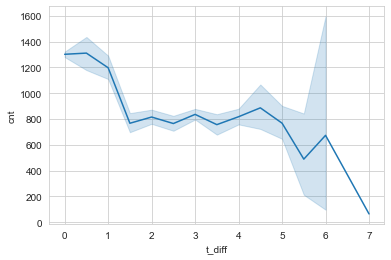

In [154]:
sns.lineplot(x=df.t_diff, y=df.cnt)

<AxesSubplot:xlabel='t_diff', ylabel='cnt'>

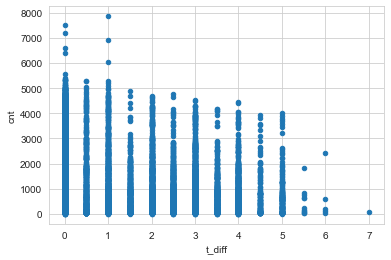

In [155]:
df.plot(kind="scatter", x="t_diff", y="cnt")

Как видно с ростом разницы между реальной и ощущаемой температурой число заказов падает, причина в том, что разниа более ощутима в холодную погоду (см. несколькими графиками ниже)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

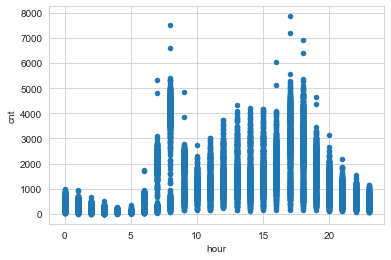

In [148]:
df.plot(kind="scatter", x="hour", y="cnt")

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,hour,month,weekday,t_diff
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01-04 00:00:00,0,1,6,1.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01-04 01:00:00,1,1,6,0.5
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01-04 02:00:00,2,1,6,0.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01-04 03:00:00,3,1,6,0.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01-04 04:00:00,4,1,6,2.0


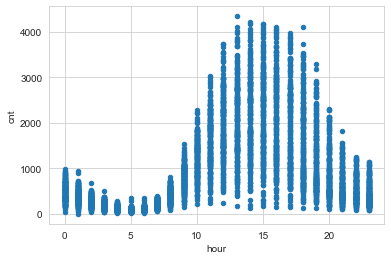

In [207]:
df_wnd = df.query("is_weekend == True")
df_wnd.plot(kind="scatter", x="hour", y="cnt")
df_wnd.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,hour,month,weekday,t_diff
4461,2015-07-09 08:00:00,7531,14.5,14.5,61.0,19.0,2.0,0.0,0.0,1.0,2015-07-09 08:00:00,8,7,3,0.0
4469,2015-07-09 16:00:00,6033,23.0,22.0,26.0,11.0,1.0,0.0,0.0,1.0,2015-07-09 16:00:00,16,7,3,1.0
4470,2015-07-09 17:00:00,7860,23.0,22.0,27.0,11.0,1.0,0.0,0.0,1.0,2015-07-09 17:00:00,17,7,3,1.0
4471,2015-07-09 18:00:00,6913,22.5,21.5,29.0,13.0,1.0,0.0,0.0,1.0,2015-07-09 18:00:00,18,7,3,1.0
5129,2015-08-06 08:00:00,6585,19.0,19.0,78.0,12.0,7.0,0.0,0.0,1.0,2015-08-06 08:00:00,8,8,3,0.0


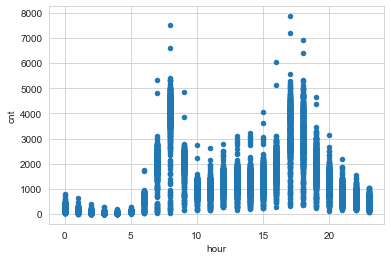

In [211]:
df_wk = df.query("is_weekend == False")
df_wk.plot(kind="scatter", x="hour", y="cnt")
#df_wk.head()
df_an = df_wk.query("cnt > 6000")
df_an.head()

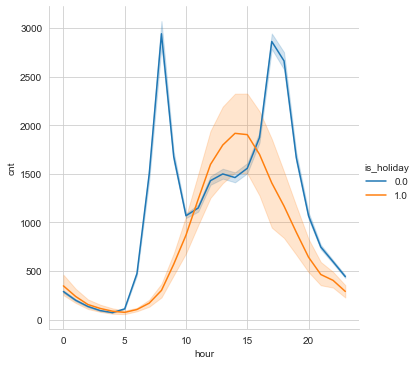

In [201]:
sns.relplot(data=df, x="hour", y="cnt", hue="is_holiday", kind="line",estimator="mean")

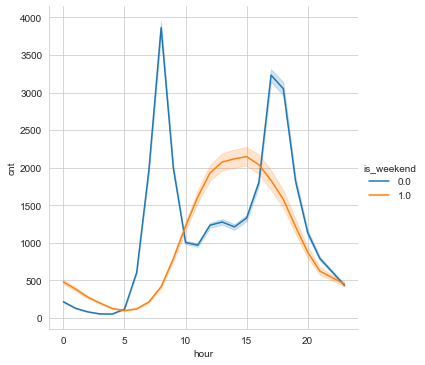

In [200]:
sns.relplot(data=df, x="hour", y="cnt", hue="is_weekend", kind="line", estimator="mean")

Исходя из графиков можно определить, что в выходные и праздничные дни заказов меньше + они происходят в середине дня, 
в то время как в рабочие дни люди используют велосипеды чтоб добраться на работу

<AxesSubplot:xlabel='month', ylabel='cnt'>

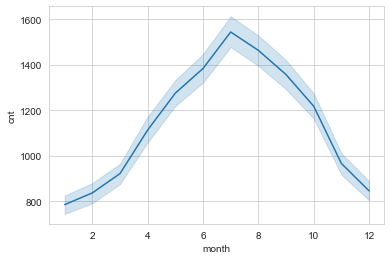

In [158]:
sns.lineplot(x=df.month, y=df.cnt, estimator="mean")

<AxesSubplot:xlabel='month', ylabel='t1'>

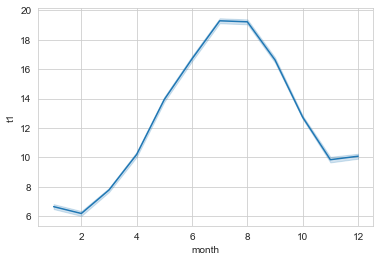

In [159]:
sns.lineplot(x=df.month, y=df.t1, estimator="mean")

<AxesSubplot:xlabel='t1', ylabel='t_diff'>

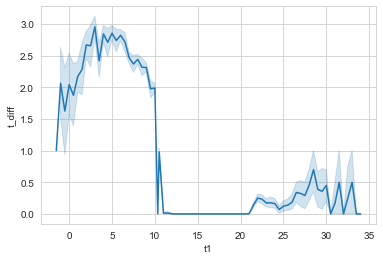

In [169]:
sns.lineplot(x=df.t1, y=df.t_diff, estimator="mean")

<AxesSubplot:xlabel='hum', ylabel='t_diff'>

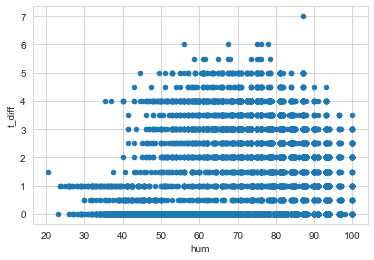

In [171]:
df.plot(kind="scatter", x="hum", y="t_diff")

<AxesSubplot:xlabel='t1', ylabel='cnt'>

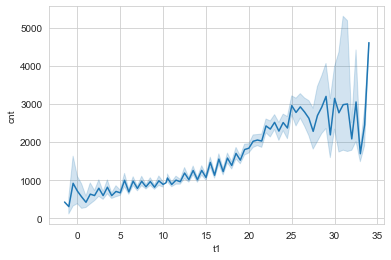

In [168]:
sns.lineplot(x=df.t1, y=df.cnt, estimator="mean")

<AxesSubplot:xlabel='t1', ylabel='cnt'>

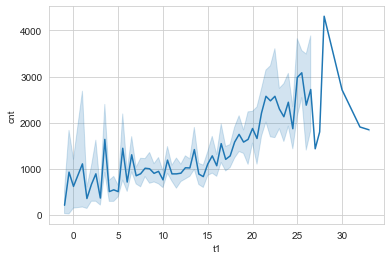

In [160]:
df_s = df.sample(frac=0.1)
sns.lineplot(x=df_s.t1, y=df_s.cnt,  estimator="mean")

In [205]:
ts = pd.Series(df["cnt"].values, index=df.index)
mean_smoothed = ts.rolling(window=20).mean()
mean_smoothed
df2 = pd.DataFrame(mean_smoothed)
df2.columns = ["MA"]
df3 = pd.concat([df, df2], axis=1).query("MA == MA")
df3.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,hour,month,weekday,t_diff,MA
19,2015-01-04 19:00:00,379,3.0,1.0,93.0,7.0,3.0,0.0,1.0,3.0,2015-01-04 19:00:00,19,1,6,2.0,417.50
20,2015-01-04 20:00:00,328,3.0,3.0,93.0,4.0,3.0,0.0,1.0,3.0,2015-01-04 20:00:00,20,1,6,0.0,424.80
21,2015-01-04 21:00:00,221,3.0,2.5,93.0,5.0,4.0,0.0,1.0,3.0,2015-01-04 21:00:00,21,1,6,0.5,428.95
22,2015-01-04 22:00:00,178,3.0,2.0,93.0,6.0,4.0,0.0,1.0,3.0,2015-01-04 22:00:00,22,1,6,1.0,431.15
23,2015-01-04 23:00:00,157,4.0,3.5,87.0,5.0,4.0,0.0,1.0,3.0,2015-01-04 23:00:00,23,1,6,0.5,435.40


In [120]:
df3.shape

(17395, 14)

<AxesSubplot:xlabel='t1', ylabel='cnt'>

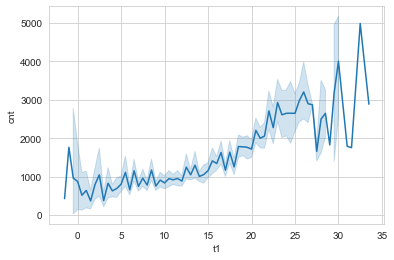

In [161]:
df_s = df3.sample(frac=0.2)
sns.lineplot(x=df_s.t1, y=df_s.cnt,  estimator="mean")

Очевидно, число заказов падает с ухудшением погодных условий, однако это падение можно было бы невелировать 
в температурной зоне от 15 до 20 градусов, предложив более выгодные тарифы осенью и весной

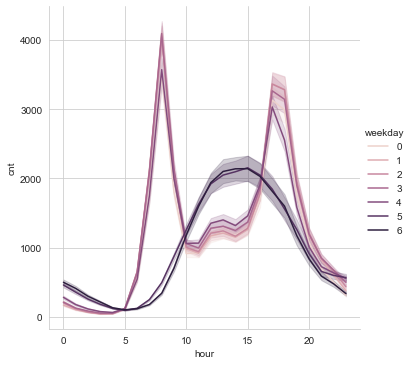

In [162]:
sns.relplot(data=df, x="hour", y="cnt", hue="weekday", kind="line", estimator="mean")

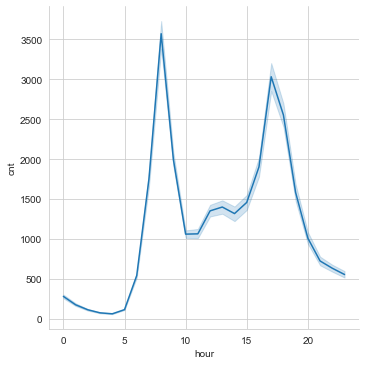

In [147]:
sns.relplot(data=df.query("weekday == 4"), x="hour", y="cnt", kind="line", estimator="mean")

Как видно из графика, после окончания рабочего дня по пятницам спад спроса на велосипеды более ярко выражен

<AxesSubplot:xlabel='weather_code', ylabel='cnt'>

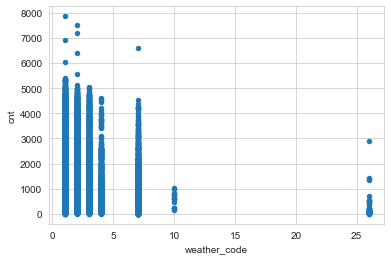

In [163]:
df.plot(kind="scatter", x="weather_code", y="cnt")

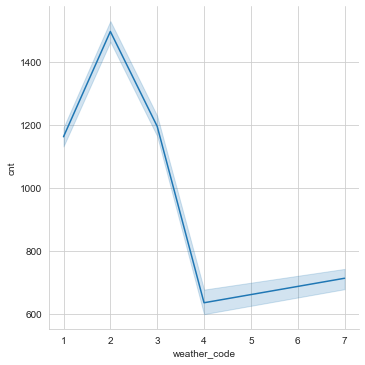

In [186]:
sns.relplot(data=df.query("weather_code < 10"), x="weather_code", y="cnt",kind= "line", estimator="mean")

In [195]:
df.query("weather_code < 5 and cnt > 6000")

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,hour,month,weekday,t_diff
4461,2015-07-09 08:00:00,7531,14.5,14.5,61.0,19.0,2.0,0.0,0.0,1.0,2015-07-09 08:00:00,8,7,3,0.0
4469,2015-07-09 16:00:00,6033,23.0,22.0,26.0,11.0,1.0,0.0,0.0,1.0,2015-07-09 16:00:00,16,7,3,1.0
4470,2015-07-09 17:00:00,7860,23.0,22.0,27.0,11.0,1.0,0.0,0.0,1.0,2015-07-09 17:00:00,17,7,3,1.0
4471,2015-07-09 18:00:00,6913,22.5,21.5,29.0,13.0,1.0,0.0,0.0,1.0,2015-07-09 18:00:00,18,7,3,1.0
5138,2015-08-06 17:00:00,7208,22.5,22.5,55.0,17.5,2.0,0.0,0.0,1.0,2015-08-06 17:00:00,17,8,3,0.0
5139,2015-08-06 18:00:00,6394,21.5,21.5,58.5,20.0,2.0,0.0,0.0,1.0,2015-08-06 18:00:00,18,8,3,0.0


??? Выбросы объясняются забастовкой водителей автобусов

https://ria.ru/20150205/1046158078.html ???

"weathe_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
2 = scattered clouds / few clouds 
3 = Broken clouds 
4 = Cloudy 
7 = Rain/ light Rain shower/ Light rain 
10 = rain with thunderstorm 
26 = snowfall 
94 = Freezing Fog

<AxesSubplot:>

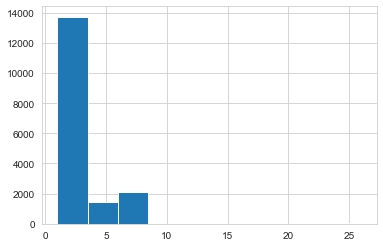

In [167]:
df['weather_code'].hist()

Несмотря на то, что в анализируемый период большая часть наблюдений приходится на безоблачную погоду, видно что в легкий дождь жители Лондона ИНОГДА тоже активно арендуют велосипеды

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

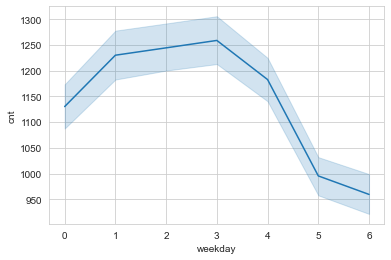

In [172]:
sns.lineplot(x=df.weekday, y=df.cnt,  estimator="mean")

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

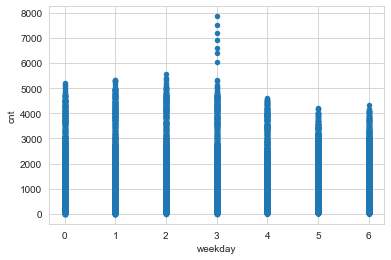

In [173]:
df.plot(kind="scatter", x="weekday", y="cnt")

Как видно, велосипеды в основном используются как средство, чтобы добраться на работу, а не в развлекательных целях
В четверг в выборке наблюдаются выбросы

In [174]:
df.query("weekday == 3 and cnt > 5500")

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,hour,month,weekday,t_diff
4461,2015-07-09 08:00:00,7531,14.5,14.5,61.0,19.0,2.0,0.0,0.0,1.0,2015-07-09 08:00:00,8,7,3,0.0
4469,2015-07-09 16:00:00,6033,23.0,22.0,26.0,11.0,1.0,0.0,0.0,1.0,2015-07-09 16:00:00,16,7,3,1.0
4470,2015-07-09 17:00:00,7860,23.0,22.0,27.0,11.0,1.0,0.0,0.0,1.0,2015-07-09 17:00:00,17,7,3,1.0
4471,2015-07-09 18:00:00,6913,22.5,21.5,29.0,13.0,1.0,0.0,0.0,1.0,2015-07-09 18:00:00,18,7,3,1.0
5129,2015-08-06 08:00:00,6585,19.0,19.0,78.0,12.0,7.0,0.0,0.0,1.0,2015-08-06 08:00:00,8,8,3,0.0
5138,2015-08-06 17:00:00,7208,22.5,22.5,55.0,17.5,2.0,0.0,0.0,1.0,2015-08-06 17:00:00,17,8,3,0.0
5139,2015-08-06 18:00:00,6394,21.5,21.5,58.5,20.0,2.0,0.0,0.0,1.0,2015-08-06 18:00:00,18,8,3,0.0


Как оказалось дата необычного спроса на аренду велосипедов - день забастовки в лондонском метро (2015.07.09)
Второй выброс объяснить пока не удалось
https://ria.ru/20150709/1123507295.html

In [ ]:
# ============================================================
# ============================================================
# ============================================================
# ============================================================
# ============================================================

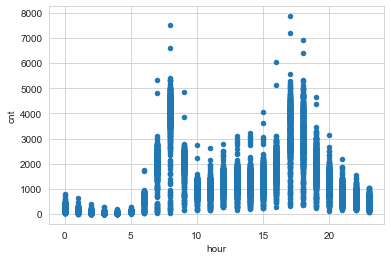

In [213]:
g = df_wk.plot(kind="scatter", x="hour", y="cnt")
fig = g.get_figure()
fig.savefig("graphs/cnt_by_working_scatter.png")